### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Import dataset from google drive

In [2]:
dataset = pd.read_excel('/content/drive/MyDrive/IOLP studykhkval.xlsx')

## Explore the dataset

In [3]:
dataset.shape

(108, 3)

In [4]:
dataset.head()

,KH,KV,AL
0,41.5,40.50,20.30
1,41.5,40.50,20.56
2,41.5,40.50,20.61
3,41.5,40.75,20.79
4,42.0,41.00,21.10


In [5]:
dataset.describe()

,KH,KV,AL
count,108.000000,108.000000,108.000000
mean,44.756481,44.129167,22.704167
std,1.551636,1.760219,0.791164
min,41.500000,40.500000,20.300000
25%,43.500000,42.750000,22.305000
50%,44.750000,44.000000,22.775000
75%,46.000000,45.500000,23.222500
max,47.750000,48.500000,24.200000


In [6]:
dataset.corr()

,KH,KV,AL
KH,1.000000,0.992922,0.981874
KV,0.992922,1.000000,0.978135
AL,0.981874,0.978135,1.000000


<Axes: >

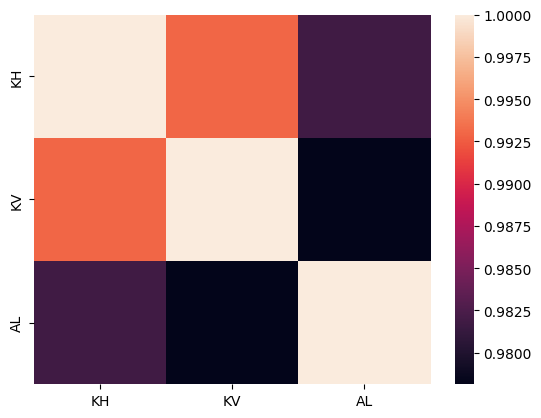

In [7]:
sns.heatmap(dataset.corr())


Text(0.5, 1.0, 'Dataset scatter plot')

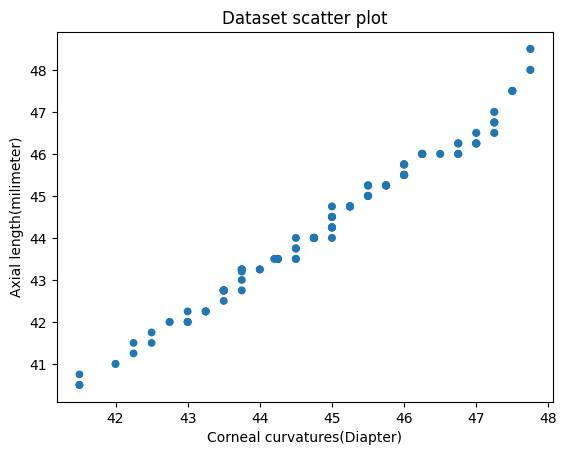

In [8]:
plt.scatter(dataset.KH, dataset.KV, dataset.AL)
plt.xlabel('Corneal curvatures(Diapter)')
plt.ylabel('Axial length(milimeter)')
plt.title('Dataset scatter plot')

## Define X and y as independant and dependant variable

In [9]:
X = dataset.drop(['AL'], axis=1).values
y = dataset['AL'].values

## Split the dataset into training and testing set

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)


## Fit the model for training by LinearRegression Algorithm

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

## Visualize the predicted y values (Axial length)

In [ ]:
y_pred = model.predict(X_test)
y_pred

## Look for the coefficinets of X1 and X2 values (independant variables)

In [13]:
print(model.coef_)

[0.32984876 0.14595338]


## Look for the model intercept (Slope)

In [14]:
print(model.intercept_)

1.5103816265249073


## Predict the axial length for the given new set of horizontal and vertical curvatures

In [15]:
model.predict([[44,	45]])

array([22.59162925])

## Evaluate the model for the Accuracy

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.9743533596736988

## Plot the results

Text(0.5, 1.0, 'Actual vs Predicted axial length')

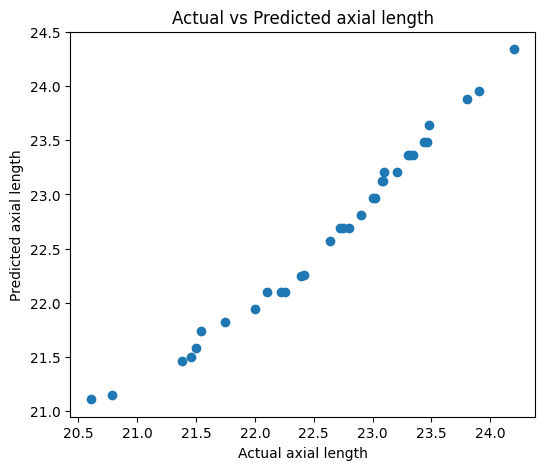

In [17]:
plt.figure(figsize=(6,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual axial length')
plt.ylabel('Predicted axial length')
plt.title('Actual vs Predicted axial length')

## Actual and predicted values difference

In [ ]:
pred_y_df = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_pred,
                         'Difference': y_test-y_pred})
pred_y_df[0:20]

# prediction model regression equation
## y = m1*X1 + m2*X2 +b
## predicted axial length (y) = m1*KH+m2*KV+b
## y = 0.329*KH + 0.146*KV + 1.510

# Thank you so very much